In [ ]:
import numpy as np
import os
import math
from math import cos, sin
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
import glob
from scipy.io import loadmat
import cv2

In [ ]:
!wget http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip \ -O file.zip

--2022-06-17 12:30:43--  http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip
Resolving www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)... 159.226.21.60
Connecting to www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)|159.226.21.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87413900 (83M) [application/x-zip-compressed]
Saving to: ‘AFLW2000-3D.zip.1’

AFLW2000-3D.zip.1   100%[===================>]  83.36M   342KB/s    in 4m 40s  

2022-06-17 12:35:23 (305 KB/s) - ‘AFLW2000-3D.zip.1’ saved [87413900/87413900]

--2022-06-17 12:35:23--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
--2022-06-17 12:35:24--  http://file.zip/
Resolving file.zip (file.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘file.zip’
FINISHED --2022-06-17 12:35:24--
Total wall clock time: 4m 41s
Downloaded: 1 files, 83M in 4m 40s (305 KB/s)


In [ ]:
# Loading AFLW2000 Data
!unzip /content/AFLW2000-3D.zip.1

Archive:  /content/AFLW2000-3D.zip.1
   creating: AFLW2000/
   creating: AFLW2000/Code/
  inflating: AFLW2000/Code/DrawSolidHead.m  
  inflating: AFLW2000/Code/DrawTextureHead.m  
  inflating: AFLW2000/Code/main_show_without_BFM.m  
  inflating: AFLW2000/Code/main_show_with_BFM.m  
   creating: AFLW2000/Code/Mex/
  inflating: AFLW2000/Code/Mex/compile.m  
  inflating: AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
   creating: AFLW2000/Code/ModelGeneration/
  inflating: AFLW2000/Code/ModelGeneration/ModelGenerate.m  
  inflating: AFLW2000/Code/ModelGeneration/model_info.mat  
  inflating: AFLW2000/Code/Model_Exp.mat  
  inflating: AFLW2000/Code/Model_Shape_Sim.mat  
  inflating: AFLW2000/Code/NormDirection.m  
  inflating: AFLW2000/Code/readme.txt  
  inflating: AFLW2000/Code/RotationMatrix.m  
  inflating: AFLW2000/Code/Tnorm_VnormC.mexw64  
  inflating: AFLW2000/image00002.jpg  
  inflating: AFL

In [ ]:
mat = loadmat(r'/content/AFLW2000/image00004.mat')
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 29 22:50:26 2016', '__version__': '1.0', '__globals__': [], 'pt2d': array([[ -1.        ,  -1.        ,  -1.        , 231.86956522,
        247.52173913, 263.17391304,  -1.        ,  -1.        ,
         -1.        , 235.7826087 , 247.52173913, 259.26086957,
         -1.        ,  -1.        , 184.91304348, 220.13043478,
        333.60869565,  -1.        , 196.65217391, 227.95652174,
        196.65217391],
       [452.        , 452.        , 452.        , 208.39130435,
        200.56521739, 200.56521739, 452.        , 452.        ,
        452.        , 227.95652174, 224.04347826, 224.04347826,
        452.        , 452.        , 263.17391304, 271.        ,
        286.65217391, 452.        , 302.30434783, 306.2173913 ,
        345.34782609]]), 'Illum_Para': array([[ 0.84391612,  0.77328593,  0.85474807,  0.59758723,  0.65790999,
         0.53089464,  0.29654956,  1.75613928,  0.        , 20.        ]]), 'Col

In [ ]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pt2d', 'Illum_Para', 'Color_Para', 'Tex_Para', 'Shape_Para', 'Exp_Para', 'Pose_Para', 'roi', 'pt3d_68'])

In [ ]:
mat['pt3d_68'].shape

In [ ]:
mat['Pose_Para']

array([[ 4.7006503e-01,  1.1895334e+00,  3.0095881e-01,  3.3081970e+02,
         1.7319424e+02, -4.4367504e+01,  1.1811422e-03]], dtype=float32)

In [ ]:
mat['pt3d_68']

array([[ 2.81238159e+02,  2.77339417e+02,  2.74876953e+02,
         2.69523773e+02,  2.57788269e+02,  2.40968155e+02,
         2.21801483e+02,  2.05846298e+02,  2.07085449e+02,
         2.26185638e+02,  2.54814453e+02,  2.82763367e+02,
         3.06935974e+02,  3.22686584e+02,  3.31161896e+02,
         3.36497437e+02,  3.41289337e+02,  2.21999146e+02,
         2.11369659e+02,  2.08554688e+02,  2.08928970e+02,
         2.10885956e+02,  2.27247986e+02,  2.34279480e+02,
         2.44748138e+02,  2.57117004e+02,  2.71072083e+02,
         2.13090179e+02,  2.02018860e+02,  1.90403824e+02,
         1.86151962e+02,  2.03623062e+02,  2.00270554e+02,
         2.00161865e+02,  2.05586975e+02,  2.12636292e+02,
         2.19600342e+02,  2.13511414e+02,  2.16280029e+02,
         2.22670746e+02,  2.17186829e+02,  2.15854309e+02,
         2.39998108e+02,  2.41143631e+02,  2.46227020e+02,
         2.56144623e+02,  2.46851288e+02,  2.40278381e+02,
         2.06686462e+02,  1.98773880e+02,  1.95237625e+0

In [ ]:
def getx_y (file_path):
    mat = loadmat(file_path)
    points=mat['pt3d_68'][0:2]
    
    '''
    x = mat['pt3d_68'][:1]
    y =mat['pt3d_68'][1:2]
    z =mat['pt3d_68'][2:3]
    '''
    return points

In [ ]:
getx_y(r'/content/AFLW2000/image00004.mat')


array([[281.23816, 277.33942, 274.87695, 269.52377, 257.78827, 240.96815,
        221.80148, 205.8463 , 207.08545, 226.18564, 254.81445, 282.76337,
        306.93597, 322.68658, 331.1619 , 336.49744, 341.28934, 221.99915,
        211.36966, 208.55469, 208.92897, 210.88596, 227.24799, 234.27948,
        244.74814, 257.117  , 271.07208, 213.09018, 202.01886, 190.40382,
        186.15196, 203.62306, 200.27055, 200.16187, 205.58698, 212.63629,
        219.60034, 213.51141, 216.28003, 222.67075, 217.18683, 215.85431,
        239.99811, 241.14363, 246.22702, 256.14462, 246.85129, 240.27838,
        206.68646, 198.77388, 195.23763, 196.5263 , 199.83258, 211.0683 ,
        226.80066, 210.58345, 201.24966, 196.73563, 195.09518, 198.44182,
        206.93408, 199.80356, 200.1837 , 204.9532 , 225.6643 , 203.54272,
        199.18753, 197.53447],
       [265.07935, 287.04456, 307.05414, 324.187  , 340.334  , 349.407  ,
        350.9306 , 347.8684 , 345.31607, 339.48825, 337.19672, 332.8853 ,
       

In [ ]:
def getposlabel (file_path):
    mat = loadmat(file_path)
    pose = mat['Pose_Para'][0][:3]
    
    '''
    x_label = pose[:1]
    y_label =pose[1:2]
    z_label =pose[2:3]
    '''
    return pose

In [ ]:
getposlabel(r'/content/AFLW2000/image00004.mat')

array([0.47006503, 1.1895334 , 0.3009588 ], dtype=float32)

In [ ]:
from os import listdir

def list_0f_pathes(file_path):
    mylist= [f for f in os.listdir(file_path) if f.endswith('.mat')]
    return mylist

In [ ]:
def get_features_labels(file_path):
    labels=[]
    features=[]
    mylist=list_0f_pathes(file_path)
    
    for f in mylist:
        path = file_path+f

        labels.append(getposlabel(path))
        features.append(getx_y(path))
    return labels , features

In [ ]:
labels, featues =get_features_labels(r'/content/AFLW2000/')


In [ ]:
def img_name(file_path):
    img= [f for f in os.listdir(file_path) if f.endswith('.mat')]
    img=[i.replace('.mat','') for i in img]

    return img

In [ ]:
index=img_name(r'/content/AFLW2000')

In [ ]:
x_column = ['x' + str(i) for i in range(0,68)]
y_column = ['y' + str(i) for i in range(0,68)]
#z_column = ['z' + str(i) for i in range(0,68)]

x =  [i[0] for i in featues]
y =  [i[1] for i in featues]
#z =  [i[2] for i in featues]

dfx = pd.DataFrame(x, columns = x_column)
dfy = pd.DataFrame(y, columns = y_column)
#dfz = pd.DataFrame(z, columns = z_column)

df_labels = pd.DataFrame (labels , columns = ['pitch', 'yaw', 'roll'])

In [ ]:
df_features = pd.concat([dfx,dfy], axis=1)
df=pd.concat([dfx,dfy,df_labels], axis=1)

In [ ]:
df_features['index'] = index
df_labels['index'] = index
df_features = df_features.set_index('index')
df_labels = df_labels.set_index('index')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.2)

In [ ]:
df_features

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
index,,,,,,,,,,,,,,,,,,,,,
image00392,118.079071,122.504181,125.383766,131.188416,146.092346,169.909409,198.594910,225.257965,230.216675,209.427856,...,309.782501,309.857483,311.646240,308.176758,309.030548,310.360229,313.022156,302.758728,301.742981,301.333221
image00032,147.385315,143.063782,137.998077,137.558670,144.704132,160.506271,180.784744,196.830383,200.384430,187.811630,...,339.452454,333.172241,325.615601,325.684540,324.110352,324.208252,324.898712,327.016724,328.294220,327.821472
image00713,151.435928,152.768555,159.093079,162.986267,166.111145,172.283371,178.266968,192.071304,216.814880,244.857391,...,320.853027,313.842529,299.601807,275.869324,273.654541,276.197113,303.795471,313.638123,314.514465,312.809143
image04161,287.339905,293.237000,299.991058,303.875641,302.763855,293.917572,280.079224,265.784851,261.302094,269.675171,...,309.087646,298.956726,286.858032,292.606049,297.002411,300.855957,311.535126,304.652740,300.632568,294.974121
image02635,105.226700,107.043846,111.611664,116.958908,126.286842,143.974548,166.572372,192.635956,218.971237,234.956451,...,318.909607,310.197632,295.848633,297.845276,298.352173,296.357239,294.022675,307.780334,310.579132,308.797485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image03703,76.409111,93.178192,112.765045,131.377533,155.166046,184.105881,211.112854,242.685120,282.474915,313.088348,...,336.936371,338.311707,331.230164,312.514954,307.669739,302.908569,301.528900,314.465149,320.656250,324.954010
image03762,221.754700,220.525146,222.120316,222.511536,220.486450,217.571381,212.242050,211.050446,224.505585,249.205811,...,320.121155,313.412537,305.168701,306.480408,308.022278,310.008423,314.491943,313.998199,312.622131,310.211853
image04019,215.944183,217.485840,222.244141,224.804169,224.483307,221.582748,216.068008,215.282974,227.881607,251.183899,...,287.338196,290.638733,291.829376,275.993225,271.773468,268.936157,271.595642,274.138672,277.629211,281.308441


In [ ]:
y_train_pitch= y_train['pitch']
y_train_yaw= y_train['yaw']
y_train_roll= y_train['roll']

y_test_pitch= y_test['pitch']
y_test_yaw=y_test['yaw']
y_test_roll= y_test['roll']

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.values,y_train_pitch)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[06:52:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:52:57] WARNING: /workspace/src/objective/regres

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.values,y_train_yaw)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[06:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:59] WARNING: /workspace/src/objective/regres

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train.values,y_train_roll)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[07:04:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:04:31] WARNING: /workspace/src/objective/regres

In [ ]:
from xgboost import XGBRegressor

model1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, nthread=6 ,seed=42 )
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, nthread=6 ,seed=42 )
model3 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, nthread=6 ,seed=42  )

In [ ]:
model1.fit(X_train.values,y_train_pitch)
model2.fit(X_train.values,y_train_yaw)
model3.fit(X_train.values,y_train_roll)

[15:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, max_depth=5, nthread=6, seed=42,
             subsample=0.8)

In [ ]:
#Saving models
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import joblib
# save the model to disk
filename1 = 'finalized_model1.sav'
joblib.dump(model1, filename1)
filename2 = 'finalized_model2.sav'
joblib.dump(model2, filename2)
filename3 = 'finalized_model3.sav'
joblib.dump(model3, filename3)

['finalized_model3.sav']

In [ ]:
pitch_predict =model1.predict(X_test.values)
yaw_predict =model2.predict(X_test.values)
roll_predict =model3.predict(X_test.values)


In [ ]:
pitch_predict= pd.DataFrame(data = pitch_predict, index=X_test.index)
yaw_predict = pd.DataFrame(data = yaw_predict, index=X_test.index)
roll_predict = pd.DataFrame(data = roll_predict, index=X_test.index)


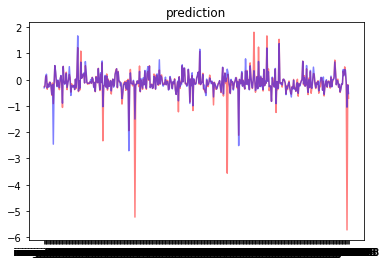

<Figure size 10800x7200 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(y_test_pitch, color = 'red',alpha=0.5)
plt.plot(pitch_predict, color = 'blue', alpha=0.5)
plt.title('prediction')
plt.figure(figsize=(150,100))
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test_pitch, pitch_predict))
print(r2_score(y_test_roll, roll_predict))
print(r2_score(y_test_yaw, yaw_predict))



0.5165599133180181
0.42849212228367417
0.9879442624613419


In [ ]:
y_test_pitch


index
image03758   -0.260647
image00279   -0.266415
image04128    0.125520
image02139    0.151529
image00547   -0.361326
                ...   
image00898    0.242879
image03781   -0.124653
image01530   -5.724188
image03793   -0.187490
image00803   -0.702382
Name: pitch, Length: 400, dtype: float64

In [ ]:
y_test


,pitch,yaw,roll
index,,,
image03758,-0.260647,-0.135281,0.152882
image00279,-0.266415,0.477783,0.195353
image04128,0.125520,-0.481070,0.472051
image02139,0.151529,0.042220,0.125075
image00547,-0.361326,0.594347,-0.255204
...,...,...,...
image00898,0.242879,-0.298655,-0.001584
image03781,-0.124653,0.066351,0.261771
image01530,-5.724188,-1.825346,5.829394


## Drawing arrows

In [ ]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [ ]:
def return_img_byname(img_name):
  file_path = '/content/AFLW2000/'
  image_path = file_path+ img_name+ '.jpg'
    
  capture = cv2.VideoCapture(image_path)
  ret, frame = capture.read()
  landmarks= df_features.loc[img_name]
  nose_x, nose_y = landmarks['x32'], landmarks['y32']
  pitch =pitch_predict.loc[img_name]
  yaw =yaw_predict.loc[img_name]
  roll= roll_predict.loc[img_name]
  capture.release()
  cv2.destroyAllWindows()

  return frame,pitch,yaw,roll, nose_x, nose_y

In [ ]:
def show_image(img,pitch,yaw,roll,nose_x, nose_y):
    #file_path = '/content/AFLW2000/'
    #image_path = file_path+ img_name+ '.jpg'
    
    #capture = cv2.VideoCapture(image_path)
    #ret, frame = capture.read()
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    """
    landmarks= df_features.loc[img_name]
    pitch =df_labels.loc[img_name]['pitch']
    yaw= df_labels.loc[img_name]['yaw']
    roll= df_labels.loc[img_name]['roll']
    """
    """
    landmarks= df_features.loc[img_name]
    pitch =pitch_predict.loc[img_name]
    yaw =yaw_predict.loc[img_name]
    roll= roll_predict.loc[img_name]
    """
    plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
    plt.show()


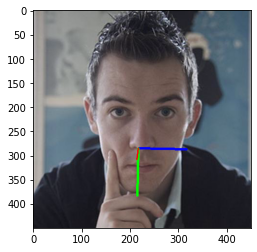

In [ ]:
frame, pitch, yaw ,roll, nose_x, nose_y = return_img_byname('image00580')
show_image(frame,pitch,yaw,roll, nose_x, nose_y)


In [ ]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pitch_predict

,0
index,
image03758,-0.308235
image00279,-0.237429
image04128,0.103354
image02139,0.209544
image00547,-0.312114
...,...
image00898,0.357899
image03781,-0.133375
image01530,-1.045106


# detecting  face landmarks 

In [ ]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install cmake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

--2022-06-17 12:49:39--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.8MB/s    in 3.4s    

2022-06-17 12:49:43 (17.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
%pylab inline
from IPython.display import clear_output
from imutils import face_utils
import dlib
import cv2

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mat', 'sin', 'roll', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
def detect_landmarks(img):
  # get landmarks from dlib
  p = "/content/shape_predictor_68_face_landmarks.dat"
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(p)
  frame_count = 0
  #path = '/content/AFLW2000/image00014.jpg'
  #img = dlib.load_rgb_image(path)
  dets = detector(img, 1)
  landmarks = np.zeros((2, 68), dtype=int)

  print("Number of faces detected: {}".format(len(dets)))
  for k, d in enumerate(dets):
      # Get the landmarks/parts for the face in box d.
      shape = predictor(img, d)
      
      shape = face_utils.shape_to_np(shape)
      #print(shape.shape)
      shape=shape.T
      x=shape[0].reshape(1, -1)
      y=shape[1].reshape(1, -1)
      xd = pd.DataFrame(x, columns = x_column)
      yd = pd.DataFrame(y, columns = y_column)
      landmarks = pd.concat([xd,yd], axis=1)

      #print(x.shape)

      return landmarks

In [ ]:
path = '/content/AFLW2000/image00014.jpg'
img = dlib.load_rgb_image(path)


marks = detect_landmarks(img)

marks


Number of faces detected: 1


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,125,127,132,138,146,160,179,203,234,265,...,349,349,347,338,338,338,344,337,337,337


In [ ]:
print(marks.shape)

(1, 136)


In [ ]:
marks['x32'].iloc[0]

219

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1


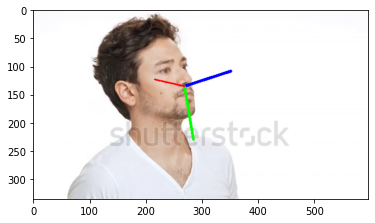

FileNotFoundError: ignored

In [ ]:
from google.colab.patches import cv2_imshow


cap = cv2.VideoCapture('/content/stock-footage-nervous-young-handsome-man-waiting-for-somebody-sighing-over-white-background.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    #cv2_imshow( frame)
    landmark = detect_landmarks(frame)
    #print(landmark)
    #cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=1
    
    if landmark is not None:
      nose_x= landmark['x32'].iloc[0]
      nose_y= landmark['y32'].iloc[0]
      #print(nose_x)
      #print(nose_y)
      pitch = model1.predict(landmark.values)
      yaw = model2.predict(landmark.values)
      roll = model3.predict(landmark.values)
      frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
      pic=draw_axis(frame1, yaw, pitch, roll, nose_x,nose_y)
      plt.imshow(pic)
      plt.show()
      plt.imsave('C:/Users/PC/Downloads/images/'+str(i)+'.jpg', pic)
  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#to delete folder
import shutil
shutil.rmtree('images')

In [ ]:
def reoderfiles(dir):
  dirFiles = [os.path.join(dir,img)
               for img in os.listdir(dir)
               if img.endswith(".jpg")]
  dirFiles.sort(key=lambda f: str(filter(str.isdigit, f)))

In [ ]:
reoderfiles("images")

In [152]:
import enum
##https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python
#https://stackoverflow.com/questions/70115576/trying-to-convert-frames-into-videos-from-multiple-folder-with-subfolders

import os
import moviepy.video.io.ImageSequenceClip
#image_folder='/content/images2/'
fps=25
'''
image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               if img.endswith(".jpg")]
  '''
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('my_video.mp4')




[MoviePy] >>>> Building video my_video.mp4
[MoviePy] Writing video my_video.mp4


100%|██████████| 343/343 [00:04<00:00, 81.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: my_video.mp4 



In [145]:
def video_axis(path):
  from google.colab.patches import cv2_imshow
  cap = cv2.VideoCapture(path)
  i=0
  image_files=[]
  while(cap.isOpened()):
      ret, frame = cap.read()
      #cv2_imshow( frame)
      landmark = detect_landmarks(frame)
      i+=1
      
      if landmark is not None:
        image_files.append('/content/images/'+str(i)+'.jpg')
        print(image_files)

    
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break

  cap.release()
  cv2.destroyAllWindows()
  return image_files

In [149]:
image_files=['/content/images/5.jpg', '/content/images/7.jpg', '/content/images/8.jpg', '/content/images/9.jpg', '/content/images/10.jpg', '/content/images/11.jpg', '/content/images/12.jpg', '/content/images/13.jpg', '/content/images/14.jpg', '/content/images/15.jpg', '/content/images/16.jpg', '/content/images/17.jpg', '/content/images/18.jpg', '/content/images/19.jpg', '/content/images/20.jpg', '/content/images/21.jpg', '/content/images/22.jpg', '/content/images/23.jpg', '/content/images/24.jpg', '/content/images/25.jpg', '/content/images/26.jpg', '/content/images/27.jpg', '/content/images/28.jpg', '/content/images/29.jpg', '/content/images/30.jpg', '/content/images/31.jpg', '/content/images/32.jpg', '/content/images/33.jpg', '/content/images/34.jpg', '/content/images/35.jpg', '/content/images/36.jpg', '/content/images/37.jpg', '/content/images/38.jpg', '/content/images/39.jpg', '/content/images/40.jpg', '/content/images/41.jpg', '/content/images/42.jpg', '/content/images/43.jpg', '/content/images/44.jpg', '/content/images/45.jpg', '/content/images/46.jpg', '/content/images/47.jpg', '/content/images/48.jpg', '/content/images/49.jpg', '/content/images/50.jpg', '/content/images/51.jpg', '/content/images/52.jpg', '/content/images/53.jpg', '/content/images/54.jpg', '/content/images/55.jpg', '/content/images/56.jpg', '/content/images/57.jpg', '/content/images/58.jpg', '/content/images/59.jpg', '/content/images/60.jpg', '/content/images/61.jpg', '/content/images/62.jpg', '/content/images/63.jpg', '/content/images/64.jpg', '/content/images/65.jpg', '/content/images/66.jpg', '/content/images/67.jpg', '/content/images/68.jpg', '/content/images/69.jpg', '/content/images/70.jpg', '/content/images/71.jpg', '/content/images/72.jpg', '/content/images/73.jpg', '/content/images/74.jpg', '/content/images/75.jpg', '/content/images/76.jpg', '/content/images/77.jpg', '/content/images/78.jpg', '/content/images/79.jpg', '/content/images/80.jpg', '/content/images/81.jpg', '/content/images/82.jpg', '/content/images/83.jpg', '/content/images/84.jpg', '/content/images/85.jpg', '/content/images/86.jpg', '/content/images/87.jpg', '/content/images/88.jpg', '/content/images/89.jpg', '/content/images/90.jpg', '/content/images/91.jpg', '/content/images/92.jpg', '/content/images/93.jpg', '/content/images/94.jpg', '/content/images/95.jpg', '/content/images/96.jpg', '/content/images/97.jpg', '/content/images/98.jpg', '/content/images/99.jpg', '/content/images/100.jpg', '/content/images/101.jpg', '/content/images/102.jpg', '/content/images/103.jpg', '/content/images/104.jpg', '/content/images/105.jpg', '/content/images/106.jpg', '/content/images/107.jpg', '/content/images/108.jpg', '/content/images/109.jpg', '/content/images/110.jpg', '/content/images/111.jpg', '/content/images/112.jpg', '/content/images/113.jpg', '/content/images/114.jpg', '/content/images/115.jpg', '/content/images/116.jpg', '/content/images/117.jpg', '/content/images/118.jpg', '/content/images/119.jpg', '/content/images/120.jpg', '/content/images/121.jpg', '/content/images/122.jpg', '/content/images/123.jpg', '/content/images/124.jpg', '/content/images/125.jpg', '/content/images/126.jpg', '/content/images/127.jpg', '/content/images/128.jpg', '/content/images/129.jpg', '/content/images/130.jpg', '/content/images/131.jpg', '/content/images/132.jpg', '/content/images/133.jpg', '/content/images/134.jpg', '/content/images/135.jpg', '/content/images/136.jpg', '/content/images/137.jpg', '/content/images/138.jpg', '/content/images/139.jpg', '/content/images/140.jpg', '/content/images/141.jpg', '/content/images/142.jpg', '/content/images/143.jpg', '/content/images/144.jpg', '/content/images/145.jpg', '/content/images/146.jpg', '/content/images/147.jpg', '/content/images/148.jpg', '/content/images/149.jpg', '/content/images/150.jpg', '/content/images/151.jpg', '/content/images/152.jpg', '/content/images/153.jpg', '/content/images/154.jpg', '/content/images/155.jpg', '/content/images/156.jpg', '/content/images/157.jpg', '/content/images/158.jpg', '/content/images/159.jpg', '/content/images/160.jpg', '/content/images/161.jpg', '/content/images/162.jpg', '/content/images/163.jpg', '/content/images/164.jpg', '/content/images/165.jpg', '/content/images/166.jpg', '/content/images/167.jpg', '/content/images/168.jpg', '/content/images/169.jpg', '/content/images/170.jpg', '/content/images/171.jpg', '/content/images/172.jpg', '/content/images/173.jpg', '/content/images/174.jpg', '/content/images/175.jpg', '/content/images/176.jpg', '/content/images/177.jpg', '/content/images/178.jpg', '/content/images/179.jpg', '/content/images/180.jpg', '/content/images/181.jpg', '/content/images/182.jpg', '/content/images/183.jpg', '/content/images/184.jpg', '/content/images/185.jpg', '/content/images/186.jpg', '/content/images/187.jpg', '/content/images/188.jpg', '/content/images/189.jpg', '/content/images/190.jpg', '/content/images/191.jpg', '/content/images/192.jpg', '/content/images/193.jpg', '/content/images/194.jpg', '/content/images/195.jpg', '/content/images/196.jpg', '/content/images/197.jpg', '/content/images/198.jpg', '/content/images/199.jpg', '/content/images/200.jpg', '/content/images/201.jpg', '/content/images/202.jpg', '/content/images/203.jpg', '/content/images/204.jpg', '/content/images/205.jpg', '/content/images/206.jpg', '/content/images/207.jpg', '/content/images/208.jpg', '/content/images/209.jpg', '/content/images/210.jpg', '/content/images/211.jpg', '/content/images/212.jpg', '/content/images/213.jpg', '/content/images/214.jpg', '/content/images/215.jpg', '/content/images/216.jpg', '/content/images/217.jpg', '/content/images/218.jpg', '/content/images/219.jpg', '/content/images/220.jpg', '/content/images/221.jpg', '/content/images/222.jpg', '/content/images/223.jpg', '/content/images/224.jpg', '/content/images/225.jpg', '/content/images/226.jpg', '/content/images/227.jpg', '/content/images/228.jpg', '/content/images/229.jpg', '/content/images/230.jpg', '/content/images/232.jpg', '/content/images/234.jpg', '/content/images/235.jpg', '/content/images/236.jpg', '/content/images/237.jpg', '/content/images/238.jpg', '/content/images/239.jpg', '/content/images/240.jpg', '/content/images/241.jpg', '/content/images/242.jpg', '/content/images/243.jpg', '/content/images/244.jpg', '/content/images/245.jpg', '/content/images/246.jpg', '/content/images/247.jpg', '/content/images/248.jpg', '/content/images/249.jpg', '/content/images/250.jpg', '/content/images/251.jpg', '/content/images/252.jpg', '/content/images/253.jpg', '/content/images/254.jpg', '/content/images/255.jpg', '/content/images/256.jpg', '/content/images/257.jpg', '/content/images/258.jpg', '/content/images/259.jpg', '/content/images/260.jpg', '/content/images/261.jpg', '/content/images/262.jpg', '/content/images/263.jpg', '/content/images/264.jpg', '/content/images/265.jpg', '/content/images/266.jpg', '/content/images/267.jpg', '/content/images/268.jpg', '/content/images/269.jpg', '/content/images/270.jpg', '/content/images/271.jpg', '/content/images/272.jpg', '/content/images/273.jpg', '/content/images/274.jpg', '/content/images/275.jpg', '/content/images/276.jpg', '/content/images/277.jpg', '/content/images/278.jpg', '/content/images/279.jpg', '/content/images/280.jpg', '/content/images/281.jpg', '/content/images/282.jpg', '/content/images/283.jpg', '/content/images/284.jpg', '/content/images/285.jpg', '/content/images/286.jpg', '/content/images/287.jpg', '/content/images/288.jpg', '/content/images/289.jpg', '/content/images/290.jpg', '/content/images/291.jpg', '/content/images/292.jpg', '/content/images/293.jpg', '/content/images/294.jpg', '/content/images/295.jpg', '/content/images/296.jpg', '/content/images/297.jpg', '/content/images/298.jpg', '/content/images/299.jpg', '/content/images/300.jpg', '/content/images/301.jpg', '/content/images/302.jpg', '/content/images/303.jpg', '/content/images/304.jpg', '/content/images/305.jpg', '/content/images/306.jpg', '/content/images/307.jpg', '/content/images/308.jpg', '/content/images/309.jpg', '/content/images/310.jpg', '/content/images/311.jpg', '/content/images/312.jpg', '/content/images/313.jpg', '/content/images/314.jpg', '/content/images/315.jpg', '/content/images/316.jpg', '/content/images/317.jpg', '/content/images/318.jpg', '/content/images/319.jpg', '/content/images/320.jpg', '/content/images/321.jpg', '/content/images/322.jpg', '/content/images/323.jpg', '/content/images/324.jpg', '/content/images/325.jpg', '/content/images/326.jpg', '/content/images/327.jpg', '/content/images/328.jpg', '/content/images/329.jpg', '/content/images/330.jpg', '/content/images/331.jpg', '/content/images/332.jpg', '/content/images/333.jpg', '/content/images/334.jpg', '/content/images/335.jpg', '/content/images/336.jpg', '/content/images/337.jpg', '/content/images/338.jpg', '/content/images/339.jpg', '/content/images/340.jpg', '/content/images/341.jpg', '/content/images/342.jpg', '/content/images/343.jpg', '/content/images/344.jpg', '/content/images/345.jpg', '/content/images/346.jpg', '/content/images/347.jpg', '/content/images/348.jpg', '/content/images/349.jpg', '/content/images/350.jpg']

In [150]:
image_files

['/content/images/5.jpg',
 '/content/images/7.jpg',
 '/content/images/8.jpg',
 '/content/images/9.jpg',
 '/content/images/10.jpg',
 '/content/images/11.jpg',
 '/content/images/12.jpg',
 '/content/images/13.jpg',
 '/content/images/14.jpg',
 '/content/images/15.jpg',
 '/content/images/16.jpg',
 '/content/images/17.jpg',
 '/content/images/18.jpg',
 '/content/images/19.jpg',
 '/content/images/20.jpg',
 '/content/images/21.jpg',
 '/content/images/22.jpg',
 '/content/images/23.jpg',
 '/content/images/24.jpg',
 '/content/images/25.jpg',
 '/content/images/26.jpg',
 '/content/images/27.jpg',
 '/content/images/28.jpg',
 '/content/images/29.jpg',
 '/content/images/30.jpg',
 '/content/images/31.jpg',
 '/content/images/32.jpg',
 '/content/images/33.jpg',
 '/content/images/34.jpg',
 '/content/images/35.jpg',
 '/content/images/36.jpg',
 '/content/images/37.jpg',
 '/content/images/38.jpg',
 '/content/images/39.jpg',
 '/content/images/40.jpg',
 '/content/images/41.jpg',
 '/content/images/42.jpg',
 '/co

In [146]:
image_files= video_axis('/content/stock-footage-nervous-young-handsome-man-waiting-for-somebody-sighing-over-white-background.mp4')

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
['/content/images/5.jpg']
Number of faces detected: 0
Number of faces detected: 1
['/content/images/5.jpg', '/content/images/7.jpg']
Number of faces detected: 1
['/content/images/5.jpg', '/content/images/7.jpg', '/content/images/8.jpg']
Number of faces detected: 1
['/content/images/5.jpg', '/content/images/7.jpg', '/content/images/8.jpg', '/content/images/9.jpg']
Number of faces detected: 1
['/content/images/5.jpg', '/content/images/7.jpg', '/content/images/8.jpg', '/content/images/9.jpg', '/content/images/10.jpg']
Number of faces detected: 1
['/content/images/5.jpg', '/content/images/7.jpg', '/content/images/8.jpg', '/content/images/9.jpg', '/content/images/10.jpg', '/content/images/11.jpg']
Number of faces detected: 1
['/content/images/5.jpg', '/content/images/7.jpg', '/content/images/8.jpg', '/content/images/9.jpg', '/content/images/10.jpg', '/c

TypeError: ignored